# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apartments_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
apartments_data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
apartments_data.shape

(23699, 22)

In [4]:
apartments_data.columns =['total_images', 'last_price', 'total_area', 'publication_date',
       'rooms', 'ceiling_height', 'total_floors', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_distance', 'city_сenter_distance',
       'parks_around3000', 'parks_distance', 'ponds_around3000',
       'ponds_distance', 'days_exposition']

In [5]:
apartments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
publication_date        23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
total_floors            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
is_studio               23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_distance       18157 non-null float64
city_сenter_distance    18180 non-null float64
parks_around3000        18181 non-null float64
parks_distance          8079 non-null float64
ponds_around300

Всего в таблице 23699 строк и  22 столбца:

- airports_distance — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- city_сenter_distance — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- publication_date — дата публикации
- floor — этаж
- total_floors — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_distance — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_distance — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- is_studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Общее количество строк в таблице - 23699, но сразу заметно, что в некоторых столбцах есть пропущенные значения. Опишем примерные предположения по обработке пропусков в этих столбцах:

- В столбце ceiling_height пропущено ~39% значений. Можно будет сгруппировать эти данные по количеству этажей в доме и названию населенного пункта, и посчитать медиану.
- От пропущенных значений в total_floors (~0.4%) скорее всего можно будет избавиться. Непонятно как правильно заменить эти пропуски, но количество этих пропусков очень мало и отсутствие этих данных не должно повлиять на анализ.
- Пропущенные значения в столбце living_area (8%) можно будет заменить исходя из общей площади квартиры, посчитав медиану. Ведь, как правило от общей площади квартры зависит площадь ее комнат.
- Пропуски в столбце is_apartment предположительно означают False.
- Пропущенные значения в столбце kitchen_area (9.6%) можно будет обработать по аналогии со значениями в living_area.
- Пропуски в столбце balcony скорее всего означают отсутствие балконов. Можно заменить эти пропуски на 0.
- Количество пропусков в столбце locality_name ~0.2%. Аналогично пропускам в total_floors - эти значения можно будет удалить.
- В столбце city_сenter_distance отсутствует ~23% значений. Возможно, это говорит о большой удаленности квартир от центра или эти значения не внесли по какой-то другой причине. Оставим эти пропуски без изменений.
- Пропуски в столбцах parks_around3000, ponds_around3000, parks_distance, ponds_distance так же оставим без изменений.
- Пропущенные значения в столбце days_exposition (~13.4%) заменим на медиану.

Типы данных некоторых столбцов так же стоит изменить:

- в столбце publication_date меняем тип данных на datetime.
- столбцы airports_distance, city_сenter_distance, parks_around3000, parks_distance, ponds_around3000, ponds_distance было бы здорово привести к целочисленным значениям, но так как в этих столбцах очень много пропусков, приведение к int64 не сработает. Оставим эти данные без изменений.
- в столбцах total_area, living_area, kitchen_area, ceiling_height оставляем тип float, но округлим значения до десятых. Для опеределния площади квартиры, ее комнат и высоты потолков этой точности будет достаточно.
- last_price - к целочисленным значениям. Достаточно цены в рублях.
- количество дней публикации days_exposition - так же к целочисленном значниям.
- is_apartment приведем к булевому типу, так как основные значения в этом столбце - True и False (за исключением огромного количества пропусков конечно)

In [6]:
apartments_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,total_floors,living_area,floor,kitchen_area,balcony,airports_distance,city_сenter_distance,parks_around3000,parks_distance,ponds_around3000,ponds_distance,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- В глаза сразу бросается максимальная высота полтолков - 100 м. Могу предположить, что в каких-нибудь элитных квартирах могут быть потолки до 10 метров, но точно не 100. Возможно, вбивая данные, не указали запятую в нужном месте. Посмотрим позже, сколько таких высоких потолков мы еще имеем и будем разбираться.
- 19 - также большая цифра для количества комнат. Возможно, это недвижимость, внутри которой располагаются комнаты гостинничного типа или что-то типа общежития.

## Предобработка данных

In [7]:
print('Количество значений в стоблце ceiling_height, которые больше 10 равно', apartments_data[apartments_data['ceiling_height']>10]['ceiling_height'].count())
apartments_data[apartments_data['ceiling_height']>10]['ceiling_height'].sort_values()

Количество значений в стоблце ceiling_height, которые больше 10 равно 25


22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
355       25.0
18545     25.0
11285     25.0
9379      25.0
14382     25.0
4643      25.0
6246      25.0
5669      26.0
10773     27.0
5807      27.0
5246      27.0
17857     27.0
4876      27.0
20478     27.0
21824     27.0
22938     27.0
21377     27.5
3148      32.0
22336     32.0
22869    100.0
Name: ceiling_height, dtype: float64

Получили 25 значений. Скорее всего в данных была допущена ошибка. Когда их вводили вручную, запятую в нужном месте не указали. С помощью метода where() разделим эти значения на 10

In [8]:
apartments_data['ceiling_height'] = apartments_data['ceiling_height'].where(apartments_data['ceiling_height']<10, apartments_data['ceiling_height']/10)

In [9]:
apartments_data['ceiling_height'].describe()

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [10]:
print('Количество пропусков в столбце is_apartment равно', apartments_data['is_apartment'].isnull().sum())
apartments_data['is_apartment'].value_counts()

Количество пропусков в столбце is_apartment равно 20924


False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
apartments_data.loc[apartments_data['days_exposition'].isna(), 'days_exposition'] = apartments_data['days_exposition'].describe()[5]
apartments_data['days_exposition'].isnull().sum()

0

In [12]:
apartments_data['balcony'] = apartments_data['balcony'].fillna(0)
apartments_data['balcony'].isnull().sum()

0

Как я предполагала ранее, от общей площади квартиры зависит площадь ее комнат. Проверим как коррелируют эти параметры:

In [13]:
apartments_data['total_area'].corr(apartments_data['living_area'])


0.9395373338721491

In [14]:
apartments_data['total_area'].corr(apartments_data['kitchen_area'])

0.6091211711198314

Зависимость наблюдается. Теперь будет логичным заполнить пропуски в living_area и kitchen_area, исходя из общей площади квартиры. Сгруппируем наши данные по total_area для каждого из столбцов living_area и kitchen_area и заменим NaN в этих столбцах на медианное значение по каждой группировке

In [15]:
apartments_data['living_area'] = apartments_data.groupby('total_area')['living_area'].transform(lambda x: x.fillna(x.median()))
apartments_data['kitchen_area'] = apartments_data.groupby('total_area')['kitchen_area'].transform(lambda x: x.fillna(x.median()))
print('количество пропусков в столбце living_area равно', apartments_data['living_area'].isnull().sum())
print('количество пропусков в столбце kitchen_area равно', apartments_data['kitchen_area'].isnull().sum())

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


количество пропусков в столбце living_area равно 143
количество пропусков в столбце kitchen_area равно 205


Так как для заполнения пропусков в столбце ceiling_height мы опираемся на количество этажей в доме и населенный пункт, нам необходимо, что данные в столбцах total_floors и locality_name были заполнены. Займемся обработкой пропусков в этих столбцах.

In [16]:
apartments_data.dropna(subset = ['total_floors'], inplace = True)
apartments_data.dropna(subset = ['locality_name'], inplace = True)
print('количество пропусков в столбце total_floors равно', apartments_data['total_floors'].isnull().sum())
print('количество пропусков в столбце locality_name равно', apartments_data['locality_name'].isnull().sum())

количество пропусков в столбце total_floors равно 0
количество пропусков в столбце locality_name равно 0


In [17]:
#подсчитаем количество пропусков до обработки
apartments_data['ceiling_height'].isnull().sum()

9084

In [18]:
apartments_data['ceiling_height'] = apartments_data.groupby(['total_floors','locality_name'])['ceiling_height'].transform(lambda x: x.fillna(x.median()))
apartments_data['ceiling_height'].isnull().sum()

392

Большая часть пропусков была заменена на медиану, но 392 пропуска осталось. Эти значения оставим без изменений

In [19]:
apartments_data['publication_date'] = pd.to_datetime(apartments_data['publication_date'], format = '%Y-%m-%dT%H:%M:%S')

In [20]:
list_to_integer = ['days_exposition','last_price']
for element in list_to_integer:
    apartments_data[element] = apartments_data[apartments_data[element].notnull()][element].astype(int)

In [21]:
list_to_round_float = ['total_area', 'living_area', 'kitchen_area', 'ceiling_height']
for element in list_to_round_float:
    apartments_data[element] = apartments_data[apartments_data[element].notnull()][element].round(1)

In [22]:
apartments_data['is_apartment'] = apartments_data['is_apartment'].astype('bool')  

In [23]:
apartments_data.shape

(23565, 22)

In [24]:
apartments_data.tail()

,total_images,last_price,total_area,publication_date,rooms,ceiling_height,total_floors,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_distance,city_сenter_distance,parks_around3000,parks_distance,ponds_around3000,ponds_distance,days_exposition
23694,9,9700000,133.8,2017-03-21,3,3.7,5.0,73.3,3,True,...,13.8,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95
23695,14,3100000,59.0,2018-01-15,3,2.5,5.0,38.0,4,True,...,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45
23696,18,2500000,56.7,2018-02-11,2,NaN,3.0,29.7,1,True,...,8.4,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,95
23697,13,11475000,76.8,2017-03-28,2,3.0,17.0,NaN,12,True,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602
23698,4,1350000,32.3,2017-07-21,1,2.5,5.0,12.3,1,True,...,9.0,0.0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,95


In [25]:
apartments_data.head()

,total_images,last_price,total_area,publication_date,rooms,ceiling_height,total_floors,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_distance,city_сenter_distance,parks_around3000,parks_distance,ponds_around3000,ponds_distance,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,95.0,9,True,...,15.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


In [26]:
apartments_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
publication_date        23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23173 non-null float64
total_floors            23565 non-null float64
living_area             23432 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
is_studio               23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23380 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_distance       18041 non-null float64
city_сenter_distance    18064 non-null float64
parks_around3000        18065 non-null float64
parks_distance          8030 non-null float64
ponds_arou

Можем заметить, что пропусков в данных стало значительно меньше. Там, где была возможность изменить тип данных, данные были приведены к нужному типу. Количество строк после предобработки немного уменьшилось - с 23699 до 23565, эти изменения не слишком значительны и не должны неправильно повлиять на наш дальнейший анализ. Перейдем к расчетам и добавлению новых значений в наш датафрейм 

Рассчитаем цену квадратного метра price_of_m2 и добавим эти расчеты в нашу таблицу:

In [27]:
apartments_data['price_of_m2'] = round(apartments_data['last_price']/apartments_data['total_area'])

Определим, в какой день недели, месяц и год было опубликовано объявление о продаже:

In [28]:
apartments_data['week'] = apartments_data['publication_date'].dt.weekday
apartments_data['month'] = apartments_data['publication_date'].dt.month
apartments_data['year'] = apartments_data['publication_date'].dt.year

Добавим в таблицу стобец floor_group, в котором разобьем на категории этажи для каждой квартиры, будут три типа категорий: первый, последний и другой. Для расчетов применим метод where() с помощью библиотеки numpy

In [29]:
apartments_data['floor_group'] = np.where(apartments_data['floor'] == 1, 'первый', 'другой')
apartments_data['floor_group'] = np.where(apartments_data['floor'] == apartments_data['total_floors'], 'последний', apartments_data['floor_group'])
apartments_data['floor_group'].value_counts()

другой       17326
последний     3355
первый        2884
Name: floor_group, dtype: int64

Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей и сразу округлим эти значения до 2 знаков после запятой:

In [30]:
apartments_data['kitchen_area_ratio'] = round(apartments_data['kitchen_area']/apartments_data['total_area'], 2)
apartments_data['living_area_ratio'] = round(apartments_data['living_area']/apartments_data['total_area'], 2)

In [31]:
apartments_data.head()

,total_images,last_price,total_area,publication_date,rooms,ceiling_height,total_floors,living_area,floor,is_apartment,...,ponds_around3000,ponds_distance,days_exposition,price_of_m2,week,month,year,floor_group,kitchen_area_ratio,living_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,2.0,755.0,95,120370.0,3,3,2019,другой,0.23,0.47
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,81,82921.0,1,12,2018,первый,0.27,0.46
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,2.0,574.0,558,92786.0,3,8,2015,другой,0.15,0.61
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,95.0,9,True,...,3.0,234.0,424,408176.0,4,7,2015,другой,0.09,0.60
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,1.0,48.0,121,100000.0,1,6,2018,другой,0.41,0.32


## Исследовательский анализ данных

In [32]:
apartments_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23173.000000
mean,60.322813,6.540058e+06,2.070656,2.716260
std,35.657072,1.091093e+07,1.078591,0.258404
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.600000
75%,69.700000,6.790000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,10.000000


- площадь квартир имеет достаточно большой размах - от 12 кв.м. до 900 кв.м. Но среднее значение выглядит нормальным.
- цена так же имеет большой размах - от 12 тысяч рублей до 763 млн. Есть варианты квартир для людей с разным материальным положенимем.
- число комнат - от 0 до 19. Есть как студии, так и недвижимость с большим количеством комнат.
- значения по высоте потолков нормальные

Далее построим гистограммы для каждого из параметров. Напишем цикл, для построения гистограммы для кадждого из параметров, а также определим межквартильный размах и рассчитаем верхний и нижний диапазоны, после чего построим гистрограмму в нужном диапазоне:

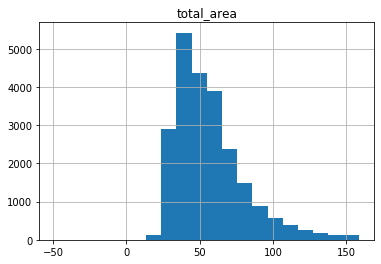

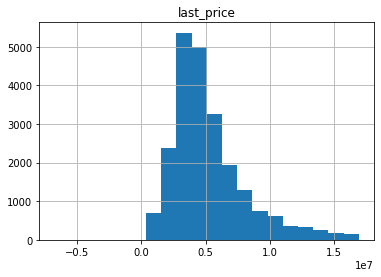

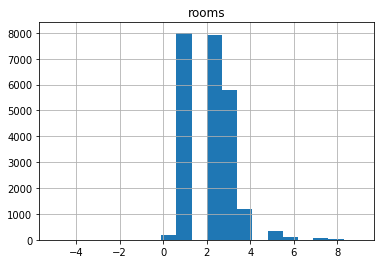

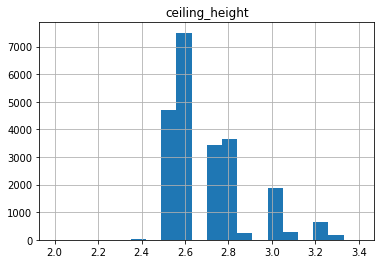

In [33]:
params_for_hist = apartments_data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]

for param in params_for_hist:
    #рассчитаем межквартильный размах
    interquartile_range = apartments_data[param].quantile(0.75) - apartments_data[param].quantile(0.25)
    
    #рассчитаем верхний и нижний диапазоны
    data_min = apartments_data[param].min()
    min_quartile = apartments_data[param].quantile(0.25) - interquartile_range*3
    
    
    data_max = apartments_data[param].max()
    max_quartile = apartments_data[param].quantile(0.75) + interquartile_range*3

        
    params_for_hist.hist(param, bins = 20, range =((min_quartile),(max_quartile)))

- Видим размеры квартир от 12 до ~160 кв. м.  Наиболее популярыне для продажи квартиры имеют размеры около 40 кв.м. 
- По гистрограмме цены можно сказать, что стоимость которая встречатеся чаще всего находятся около 3млн
- Чаще встречаются однокомнатные квартиры, далее по полпулярности 2-ух комнатные, а после 3, 4 и более комнат
- Наиболее часто встречающая высота потолков составляет 2,6 м.

Изучим подробнее время продажи квартир:

In [34]:
apartments_data['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Между средней (169) и медианой (95) - большая разница. Это может говорить либо о не нормальном распределении, либо о том, что в данных есть выбросы. Построим гистрограмму:

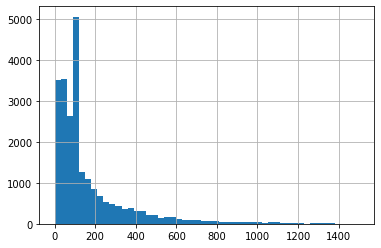

In [35]:
apartments_data['days_exposition'].hist(bins = 50, range=(0,1500))

Видим, что основная часть квартир продавалась за первые 100 дней (приблизительно 3 месяца). Так же можно уидеть, что есть значения больше 1000, продавать квартиры такой срок аномально долго. Отталкиваясь от исследования [Сбербанка](https://realty.rbc.ru/news/5d89eb989a79474e76307ad5), средний срок продажи квартиры в Санкт-Петербурге составляет 68 дней. Нужно ознакомитться с данными поближе и в дальнейшем избавиться от выбросов. Построим boxplot

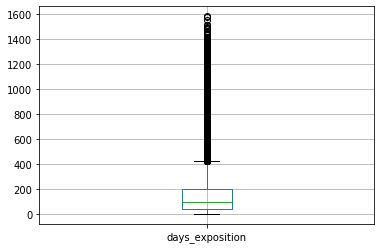

In [36]:
apartments_data.boxplot(column='days_exposition')

Посмотрим на данные более детатально, возьмем выборку значений от 0 до 500

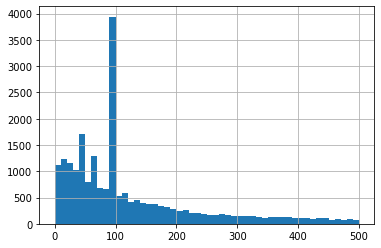

In [37]:
apartments_data['days_exposition'].hist(bins = 50, range=(0,500))

Теперь пики выглядят нагляднее и можно знаметить, что большая часть квартир была продана в течение 40 дней. На 40 днях наблюдается пик, так на 60, но самый большой пик можем заметить на значении 100.

По анализу продажи квартир от Сбера (упоминалось ранее) срок продажи квартир в среднем составляет от 3 недель до половины года. Но в этих данных не были учтены очень маленькие города и областные районы, где скорее всего срок продажи был бы больше. Поэтому для дальнейших рассчетов примем срок продажи квартиры от 3 недель до 1 года.

Теперь перейдем к удалению редких и выбивающихся значений. Для исследуемых данных определим диапазон, исходя из которого избавимся от неликвидных значений:

- Примем срок продажи квартиры от 3 недель до 1 года.
- По [данным аналитиков](http://www.rossk.ru/news/%D0%A2%D0%B5%D0%BD%D0%B4%D0%B5%D0%BD%D1%86%D0%B8%D0%B8/maksimalnaya-tsena-kvartir-v-peterburge-dostigaet-/) застройщика «Альфа Фаберже», максимальные цены в элитных локациях Санкт-Петербрга находились в диапазоне 1,3-1,5 млн рублей за квадратный метр., а минимальная стоимость кв.м. составляет около 70 тыс. рублей (данные сайта [realtymag.ru](https://www.realtymag.ru/leningradskaya-oblast/kvartira/prodazha/prices))
- Высота потолков в хрущевках в среднем от 2.4 м, а в элитном жилье - 5 метров
- Максимальное количество комнат если смотреть на сайте ЦИАНа - 6 комнат, но тем не менее есть недвижимость и с большим количеством комнат, поэтому для расчетов возмем в среднем - 8 комнат
- Минимальная площадь квартир в Лен. области на ЦИАНе составляет примерно 20 кв. м., максимальная - 900 кв. м. Размер жилой площади при этом обычно от 14 кв.м., кухни - 8 кв.м

На основании выделенных диапазонов, построим гистограммы с вычетом выбросов и лишних данных:

In [38]:
apartments_data_query = apartments_data.query('days_exposition > 14 & days_exposition < 365')
apartments_data_query = apartments_data_query.query('price_of_m2 > 70000 & price_of_m2 < 1300000')
apartments_data_query = apartments_data_query.query('ceiling_height > 2 & ceiling_height < 5')
apartments_data_query = apartments_data_query.query('rooms <= 8')
apartments_data_query = apartments_data_query.query('total_area > 20 & total_area < 900')
apartments_data_query = apartments_data_query.query('living_area > 14')
apartments_data_query = apartments_data_query.query('kitchen_area >8')

In [39]:

apartments_data_query.describe()

,total_images,last_price,total_area,rooms,ceiling_height,total_floors,living_area,floor,kitchen_area,balcony,...,parks_distance,ponds_around3000,ponds_distance,days_exposition,price_of_m2,week,month,year,kitchen_area_ratio,living_area_ratio
count,9549.000000,9.549000e+03,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,...,3764.000000,8456.000000,4488.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000
mean,10.648654,8.503072e+06,68.704974,2.138130,2.781495,13.161797,37.913446,7.202220,12.811855,0.678081,...,504.451116,0.831362,515.471034,114.164206,115534.948581,2.556289,6.401403,2017.536287,0.206251,0.534517
std,5.879821,1.000474e+07,38.551714,1.120084,0.245982,6.938815,24.781944,5.496776,6.092274,1.044387,...,358.749742,0.961563,277.899339,81.040323,47414.263697,1.794040,3.510509,0.907232,0.073146,0.096655
min,0.000000,1.811250e+06,20.700000,0.000000,2.300000,1.000000,14.100000,1.000000,8.100000,0.000000,...,4.000000,0.000000,13.000000,15.000000,70050.000000,0.000000,1.000000,2014.000000,0.030000,0.160000
25%,6.000000,4.500000e+06,42.000000,1.000000,2.600000,7.000000,19.000000,3.000000,9.600000,0.000000,...,288.000000,0.000000,289.000000,59.000000,90461.000000,1.000000,3.000000,2017.000000,0.150000,0.460000
50%,10.000000,6.200000e+06,60.200000,2.000000,2.700000,12.000000,32.700000,5.000000,11.000000,0.000000,...,456.000000,1.000000,500.000000,95.000000,105571.000000,3.000000,6.000000,2018.000000,0.190000,0.530000
75%,15.000000,9.000000e+06,80.000000,3.000000,2.800000,18.000000,47.000000,10.000000,13.900000,1.000000,...,633.000000,1.000000,729.000000,147.000000,126214.000000,4.000000,10.000000,2018.000000,0.260000,0.600000
max,50.000000,3.000000e+08,631.200000,8.000000,4.900000,36.000000,332.000000,31.000000,107.000000,5.000000,...,3013.000000,3.000000,1337.000000,364.000000,995984.000000,6.000000,12.000000,2019.000000,0.790000,0.970000


   
600 квадратов это несколько квартир (коттедж или таунхаус) или 3-этажный загородный дом. 300 млн скорее на коммерческую недвижку смахивает. Очень интересно.

In [40]:

apartments_data_query[apartments_data_query.last_price > 100e6]

,total_images,last_price,total_area,publication_date,rooms,ceiling_height,total_floors,living_area,floor,is_apartment,...,ponds_around3000,ponds_distance,days_exposition,price_of_m2,week,month,year,floor_group,kitchen_area_ratio,living_area_ratio
793,20,135000000,310.0,2018-05-22,4,3.3,5.0,250.0,2,True,...,3.0,190.0,342,435484.0,1,5,2018,другой,0.16,0.81
1188,20,118000000,290.6,2018-06-01,6,3.8,6.0,188.7,3,True,...,0.0,NaN,316,406056.0,4,6,2018,другой,0.08,0.65
1300,14,120000000,280.0,2018-07-12,5,4.7,4.0,162.0,3,True,...,3.0,339.0,225,428571.0,3,7,2018,другой,0.11,0.58
1928,11,125000000,224.5,2017-01-24,4,3.0,4.0,163.5,3,False,...,2.0,497.0,174,556793.0,1,1,2017,другой,0.13,0.73
4996,20,124000000,124.5,2017-10-12,4,3.0,4.0,67.2,2,False,...,3.0,172.0,45,995984.0,3,10,2017,другой,0.16,0.54
7857,11,150000000,230.0,2017-10-25,8,3.0,8.0,220.0,8,True,...,0.0,NaN,135,652174.0,2,10,2017,последний,0.10,0.96
12859,20,140000000,631.2,2019-04-09,7,3.9,4.0,322.3,4,True,...,2.0,210.0,95,221800.0,1,4,2019,последний,0.03,0.51
13749,7,240000000,410.0,2017-04-01,6,3.4,7.0,218.0,7,True,...,2.0,198.0,199,585366.0,5,4,2017,последний,0.10,0.53
15651,20,300000000,618.0,2017-12-18,7,3.4,7.0,258.0,5,True,...,2.0,198.0,111,485437.0,0,12,2017,другой,0.11,0.42
16461,17,245000000,285.7,2017-04-10,6,3.4,7.0,182.8,4,True,...,3.0,140.0,249,857543.0,0,4,2017,другой,0.10,0.64


Получили 18 дорогущих квартир.  300 млн и 600 квадратов это один объект. Очень много вопросов вызывает, тем более что жилая занимает меньше половины. Возможно, это и правда многоквартирный коттедж продается. Ну и там апартаменты почти везде, а они не считаются жилой недвижимостью.


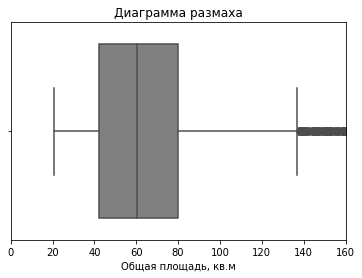

In [41]:
sns.boxplot(apartments_data_query['total_area'], color='gray')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 160)
plt.show()

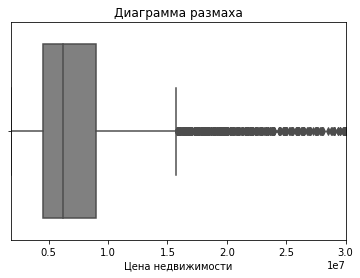

In [42]:
sns.boxplot(apartments_data_query['last_price'], color='gray')
plt.title('Диаграмма размаха')
plt.xlabel('Цена недвижимости')
plt.xlim(1.8e6, 3e7)
plt.show()

In [43]:
apartments_data_query = apartments_data_query.query('total_area <135')
apartments_data_query = apartments_data_query.query('last_price <1.6e7')

In [44]:
apartments_data_query.describe()

,total_images,last_price,total_area,rooms,ceiling_height,total_floors,living_area,floor,kitchen_area,balcony,...,parks_distance,ponds_around3000,ponds_distance,days_exposition,price_of_m2,week,month,year,kitchen_area_ratio,living_area_ratio
count,8695.000000,8.695000e+03,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,...,3186.000000,7617.000000,3893.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000,8695.000000
mean,10.476826,6.535380e+06,60.513801,1.972973,2.756515,13.572168,33.039655,7.338815,11.863243,0.690742,...,505.333647,0.776946,528.647573,112.824497,107942.717194,2.561587,6.415411,2017.546981,0.210807,0.530814
std,5.762386,2.850701e+06,21.698871,0.942361,0.219612,6.933053,15.362427,5.569787,4.125022,1.037784,...,348.319917,0.927239,277.258413,81.143174,25308.761202,1.796233,3.507715,0.889098,0.070021,0.093331
min,0.000000,1.811250e+06,20.700000,0.000000,2.300000,1.000000,14.100000,1.000000,8.100000,0.000000,...,4.000000,0.000000,13.000000,15.000000,70050.000000,0.000000,1.000000,2014.000000,0.070000,0.160000
25%,6.000000,4.350000e+06,41.200000,1.000000,2.600000,8.000000,18.600000,3.000000,9.400000,0.000000,...,293.250000,0.000000,313.000000,56.000000,89555.500000,1.000000,3.000000,2017.000000,0.160000,0.460000
50%,10.000000,5.850000e+06,57.100000,2.000000,2.700000,12.000000,31.000000,6.000000,10.700000,0.000000,...,463.000000,1.000000,516.000000,95.000000,103426.000000,3.000000,6.000000,2018.000000,0.200000,0.530000
75%,15.000000,8.000000e+06,74.000000,3.000000,2.800000,18.000000,43.000000,10.000000,13.000000,1.000000,...,635.000000,1.000000,739.000000,146.000000,121511.500000,4.000000,10.000000,2018.000000,0.260000,0.600000
max,50.000000,1.599000e+07,134.700000,7.000000,4.800000,36.000000,99.700000,31.000000,64.000000,5.000000,...,2847.000000,3.000000,1337.000000,364.000000,299000.000000,6.000000,12.000000,2019.000000,0.790000,0.970000


Построим гистограммы для каждого из параметров с учетом выброса ненужных значений:

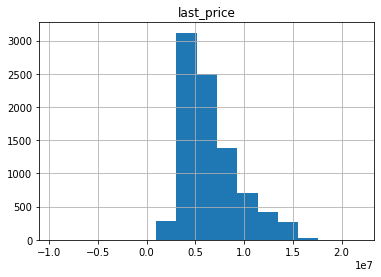

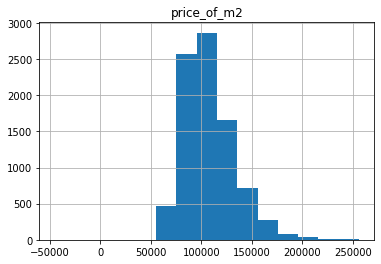

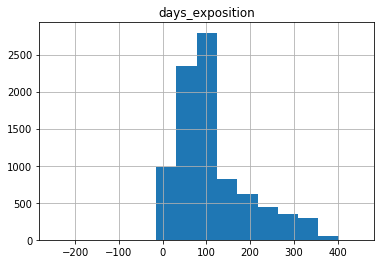

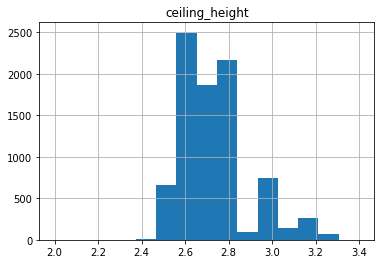

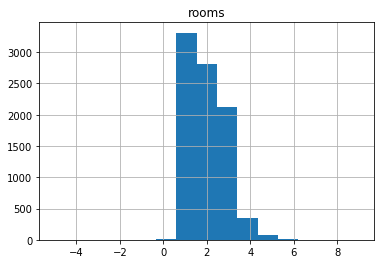

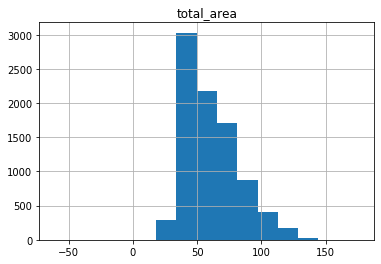

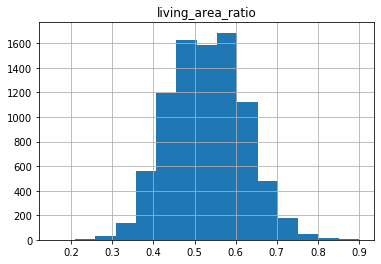

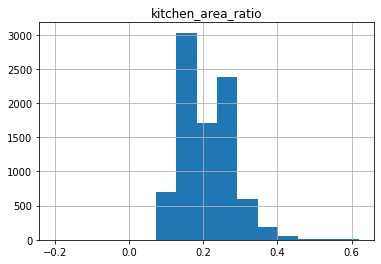

In [45]:
params_for_hist = apartments_data_query.loc[:, ['last_price', 'price_of_m2', 'days_exposition', 'ceiling_height', 'rooms','total_area', 'living_area_ratio', 'kitchen_area_ratio']]

for param in params_for_hist:
    #рассчитаем межквартильный размах
    interquartile_range = apartments_data_query[param].quantile(0.75) - apartments_data[param].quantile(0.25)
    
    #рассчитаем верхний и нижний диапазоны
    data_min = apartments_data_query[param].min()
    min_quartile = apartments_data_query[param].quantile(0.25) - interquartile_range*3
    
    
    data_max = apartments_data_query[param].max()
    max_quartile = apartments_data_query[param].quantile(0.75) + interquartile_range*3
    
    
    params_for_hist.hist(param, bins = 15, range =((min_quartile),(max_quartile)))

Наблюдаем пуассоновские распределения в данных : last_price, price_of_m2, rooms, total_area, а также распределения близкие к нормальным в данных: living_area_ratio, kitchen_area_ratio. Пик на гистограмме количества дней продажи на значении 100 также явно наблюдается.

Изучим факторы, которые больше всего влияют на стоимость квартиры.

Изучим линейную корреляцию цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, а также изучим зависимость от даты размещения: дня недели, месяца и года. и визуализируем эти зависимости:

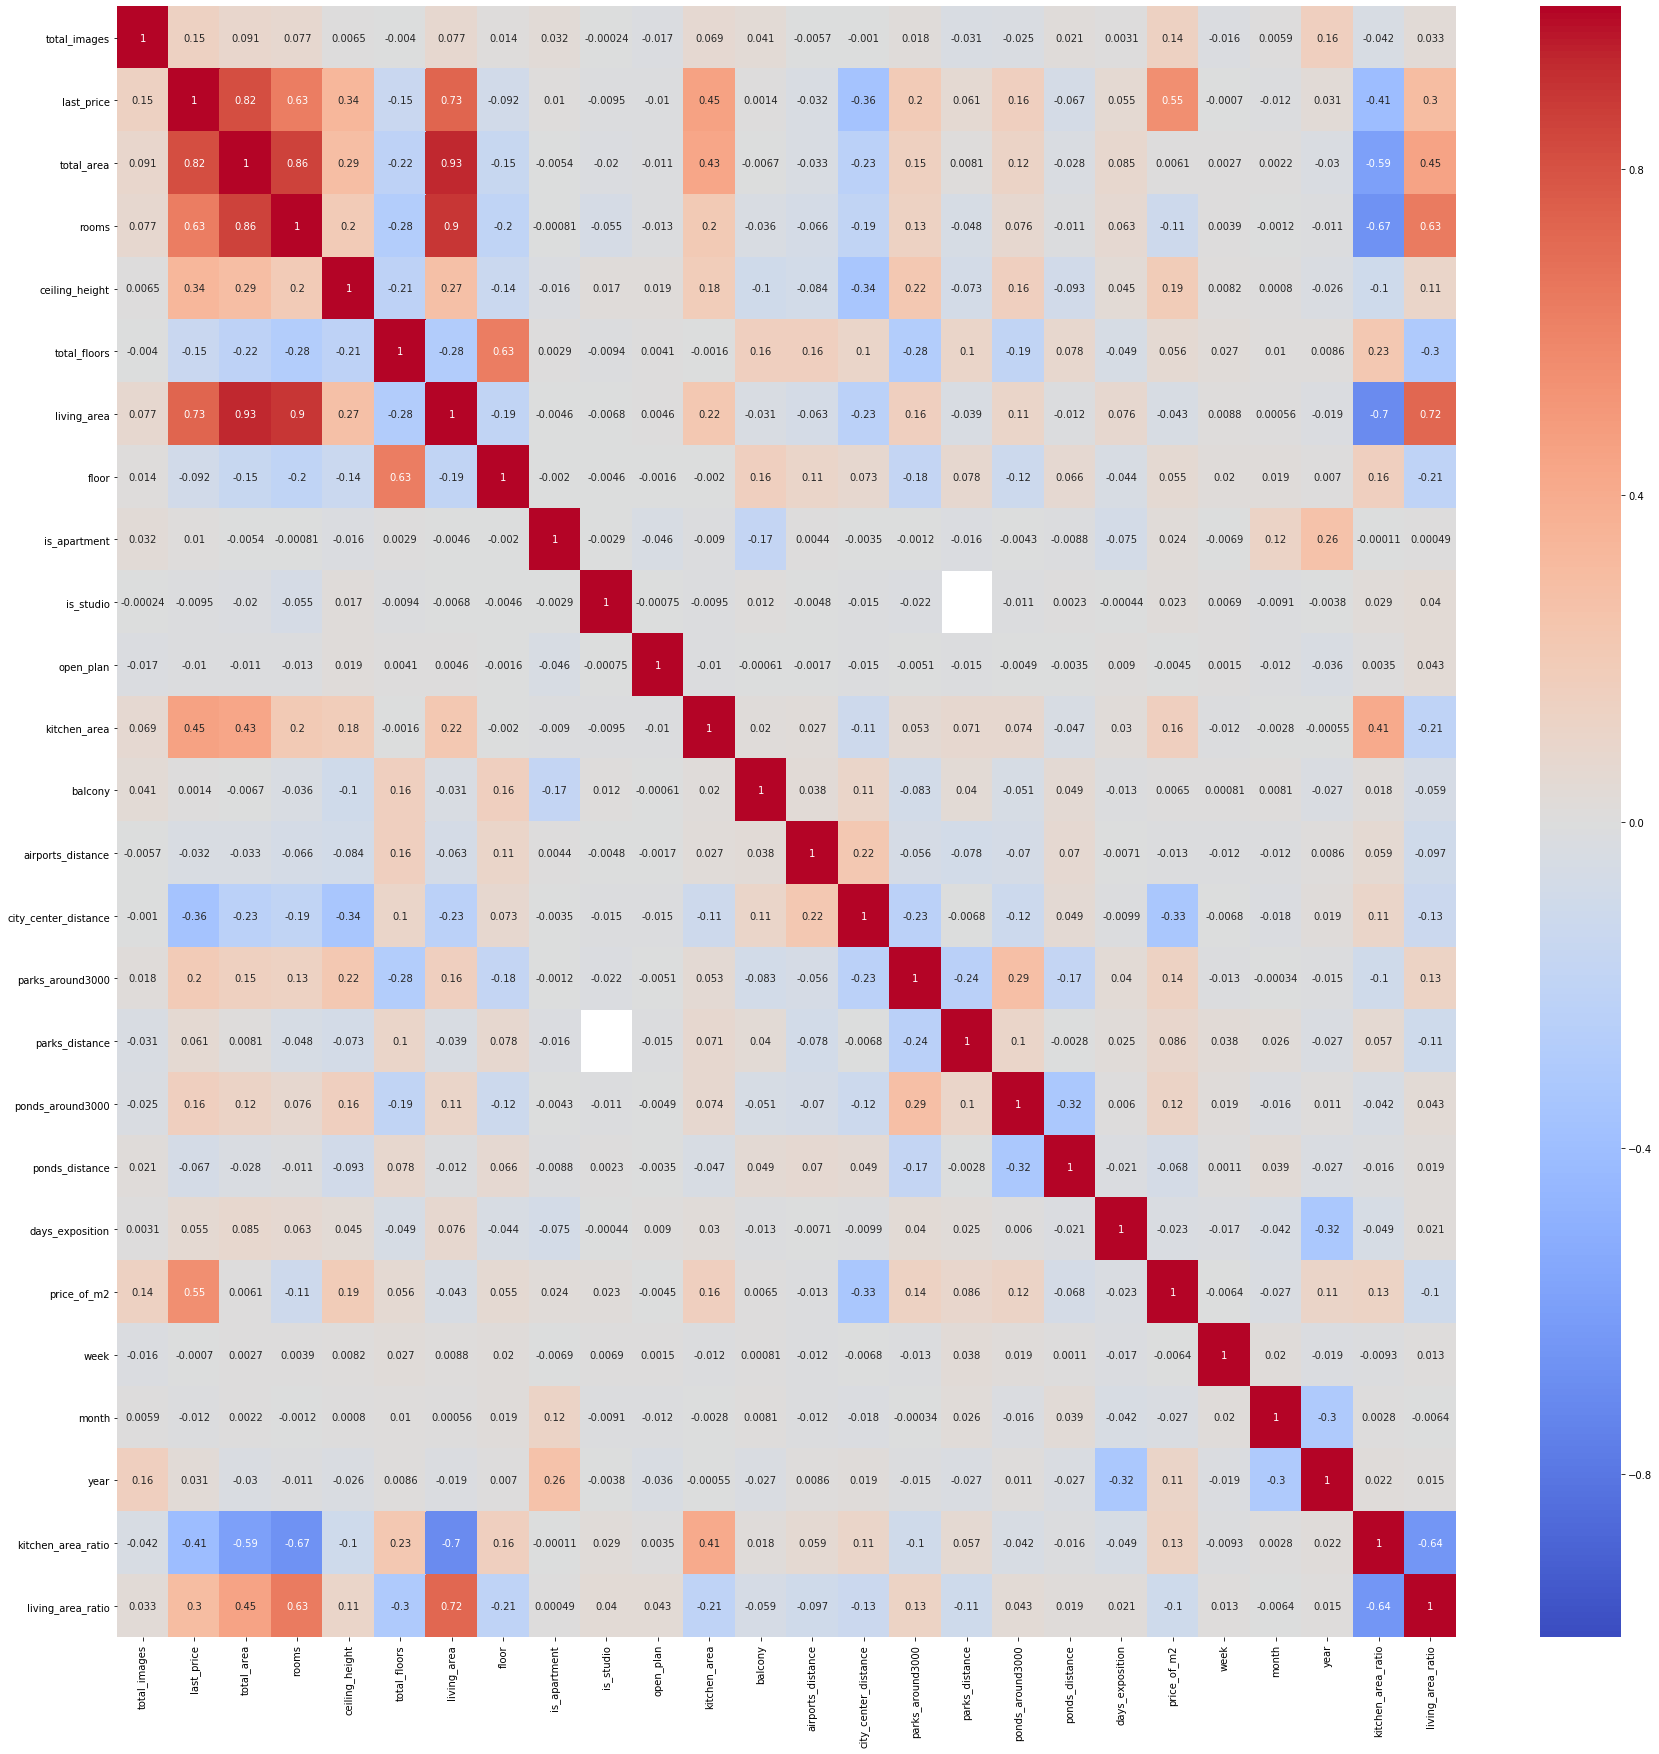

In [46]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(apartments_data_query.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax = ax)

Значительная корреляция наблюдается между ценой и стоимостью квадратного метра (0.55), количеством комнат (0.63). Корреляция цены от удаленности от центра - отрицательная (-0.36). От недели, месяца и года публикации зависимости цены пратически не наблюдается.
Заметная большая зависимость между ценой и общей площадью (0.82), что в целом очень логично.

Посмотрим, как цена зависит от количества комнат

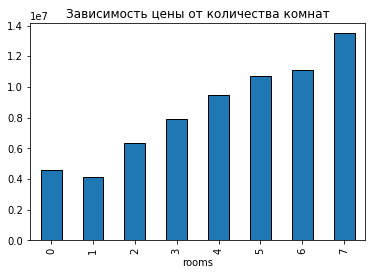

In [47]:

apartments_data_query.groupby('rooms').median()['last_price'].plot(x='rooms', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от количества комнат')

Наблюдаем логичную зависимость. Чем больше количество комнат, тем дороже стоимость жилья. Однако студии чаще будут дороже, чем однокомнатные квартиры

Визуализируем зависимость цены от этажа:

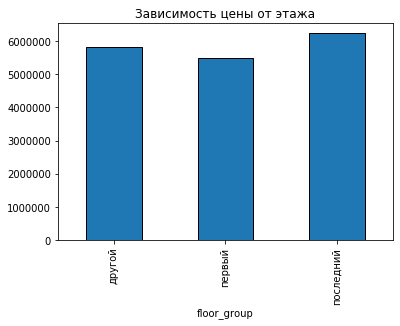

In [48]:

apartments_data_query.groupby('floor_group').median()['last_price'].plot(x='floor_group', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от этажа')

Цена квартиры на 1ом этаже ниже, чем цены на квартиры, расположенные на других этажах, в том числе и на последнем.

Посмотрим, как цена зависит от расстояния квартиры до центра города:

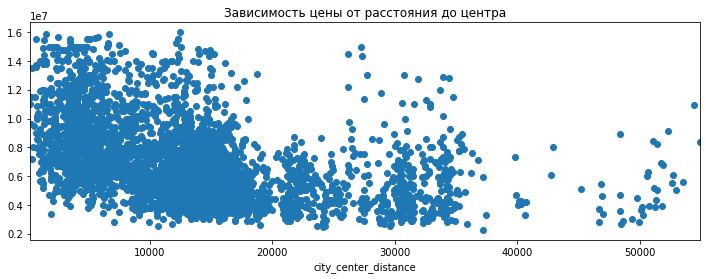

In [49]:

apartments_data_query.groupby('city_сenter_distance').median()['last_price'].plot(x='city_сenter_distance', 
                            y="last_price", style = 'o',title='Зависимость цены от расстояния до центра', figsize = (12,4))

Заметно, что, чем ближе к центру располагается квартира, тем дороже ее стоимость.

Построим графики зависимоти цены от недели, месяца и года публикации объявления:

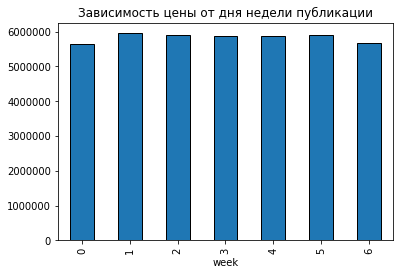

In [50]:

apartments_data_query.groupby('week').median()['last_price'].plot(x='week', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от дня недели публикации')

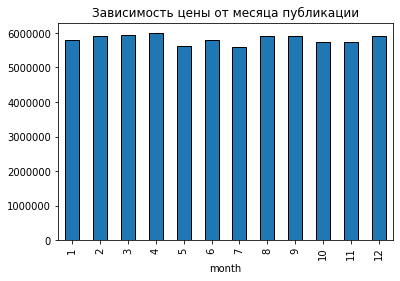

In [51]:

apartments_data_query.groupby('month').median()['last_price'].plot(x='month', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от месяца публикации')

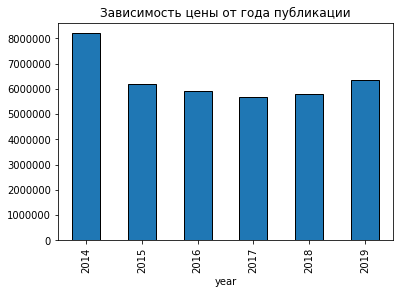

In [52]:

apartments_data_query.groupby('year').median()['last_price'].plot(x='year', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от года публикации')

Заметной зависимости между этими данными практически нет. Но можно отметить, что в 2014 году разброс цен был выше, чем в остальных. По месяцам и неделям особого различия не наблюдается, все значения примерно в равных диапазонах.

Далее определим 10 населённых пунктов с наибольшим числом объявлений, создадим для этих знаечний переменную top_10_location:

In [53]:
top_10_location = apartments_data_query['locality_name'].value_counts().sort_values(ascending=False).head(10).index
top_10_location

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары',
       'посёлок Парголово', 'деревня Кудрово', 'Пушкин', 'Кудрово',
       'Всеволожск', 'Сестрорецк', 'Колпино'],
      dtype='object')

Теперь создадим сводную таблицу data_top_10_location и в ней подсчитаем среднюю цену квадратного метра в этих населенных пунктах

In [54]:
data_top_10_location = apartments_data_query.query('locality_name in @top_10_location').pivot_table(
    index='locality_name', values = 'price_of_m2').sort_values('price_of_m2', ascending = False).reset_index()
data_top_10_location

,locality_name,price_of_m2
0,Санкт-Петербург,113073.970215
1,Пушкин,105627.509554
2,Сестрорецк,104765.843373
3,Кудрово,98673.411765
4,посёлок Парголово,93991.842391
5,деревня Кудрово,92638.327586
6,посёлок Мурино,88461.988764
7,посёлок Шушары,84371.209184
8,Колпино,82676.177215
9,Всеволожск,81061.588235


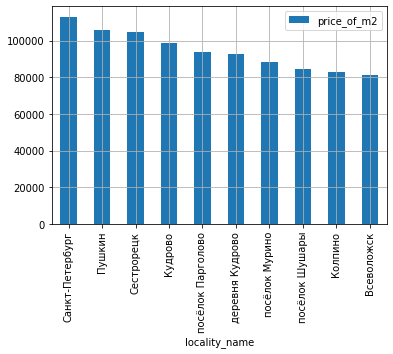

In [55]:
data_top_10_location.plot(x = 'locality_name', y = 'price_of_m2', grid = True, kind = 'bar')

По выборке городов с наибольшим числом объявлений, цен за квадратный метр наиболее высокая в Санкт-Петербурге, Пушкине и Сестрорецке, наиболее низкая - в Колпино и Всеволжске.

Изучим информацию о расстоянии до центра по каждой квартире. Выделите квартиры в Санкт-Петербурге по locality_name и постараемся выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах, и посчитаем среднюю цену для каждого километра. 

In [56]:
apartments_data_spb = apartments_data_query.query('locality_name == "Санкт-Петербург"')
apartments_data_spb['city_сenter_distance_km'] = round(apartments_data_spb['city_сenter_distance']/1000,1)
#не получилось перевести в int из-за пропусков

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Рассчитаем среднюю цену для каждого колиметра. Для этого сгруппируем данные по столбцу city_сenter_distance_km для столбца price_of_m2 и посчитаем среднее. Постройте график и определим, как цена зависит от удалённости от центра

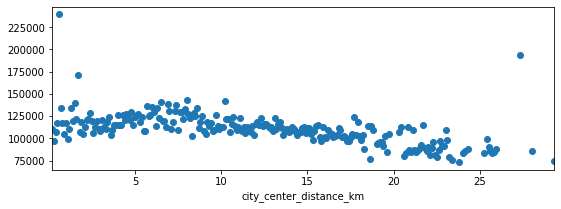

In [57]:

apartments_data_spb_km_mean = apartments_data_spb.groupby(['city_сenter_distance_km'])['price_of_m2'].mean().astype(int)
apartments_data_spb_km_mean.plot(x = 'city_сenter_distance_km', y = 'price_of_m2', figsize = (9,3), style = 'o')

Далее проанализируем сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [58]:
apartments_data_spb_in_center = apartments_data_spb.query('city_сenter_distance_km<=3')

In [59]:
apartments_data_spb_in_center[['total_area','last_price', 'price_of_m2','rooms', 'ceiling_height', 'city_сenter_distance_km']].describe()

,total_area,last_price,price_of_m2,rooms,ceiling_height,city_сenter_distance_km
count,254.000000,2.540000e+02,254.000000,254.000000,254.000000,254.000000
mean,81.398425,9.398881e+06,118528.992126,2.779528,3.110236,1.940551
std,22.525573,2.822128e+06,32951.628264,0.989377,0.369988,0.698197
min,34.300000,3.380000e+06,70089.000000,1.000000,2.500000,0.200000
25%,64.500000,7.300000e+06,95667.500000,2.000000,2.900000,1.400000
50%,80.750000,8.900000e+06,111621.500000,3.000000,3.000000,2.000000
75%,97.000000,1.150000e+07,132854.500000,3.000000,3.300000,2.500000
max,134.700000,1.590000e+07,299000.000000,6.000000,4.800000,3.000000


Количественные показатели в норме, нет сильных различий между средним и медианой. Есть квартиры, распалогающиеся в самом центре города и также в радиусе 7 км.

Построим графики зависимости цены от этих параметров:

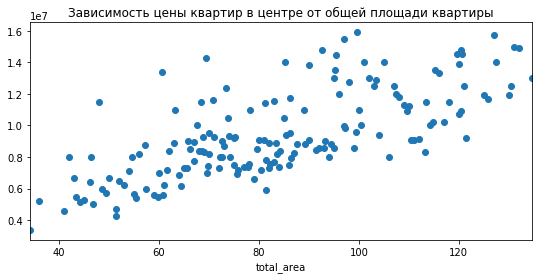

In [60]:
# 'total_area','last_price','rooms', 'ceiling_height', 'city_сenter_distance_km']]
apartments_data_spb_in_center.groupby('total_area').median()['last_price'].plot(x='total_area', y="last_price",style = 'o',
                            title='Зависимость цены квартир в центре от общей площади квартиры', figsize = (9,4))

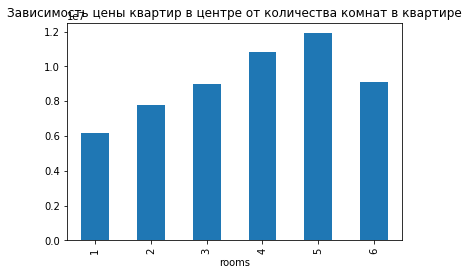

In [61]:

apartments_data_spb_in_center.groupby('rooms').median()['last_price'].plot(x='rooms', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от количества комнат в квартире')

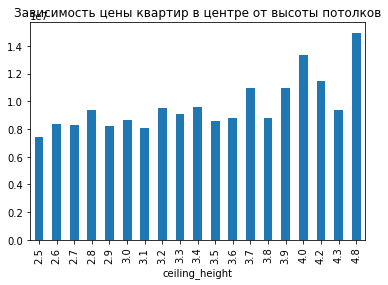

In [62]:

apartments_data_spb_in_center.groupby('ceiling_height').median()['last_price'].plot(x='ceiling_height', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от высоты потолков')

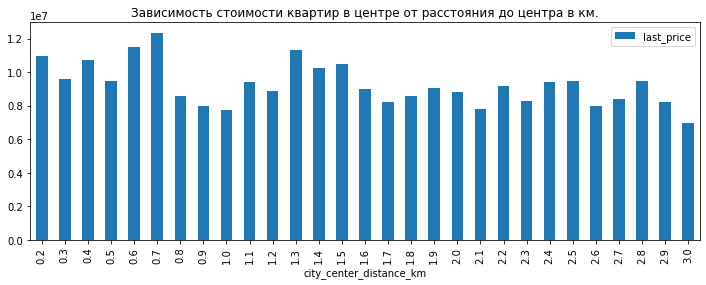

In [63]:

apartments_data_spb_in_center.groupby('city_сenter_distance_km').median()[
    'last_price'].reset_index().plot(x='city_сenter_distance_km', y="last_price",
    kind = 'bar', title='Зависимость стоимости квартир в центре от расстояния до центра в км.', figsize=(12,4))


- Наблюдается зависимость между количеством комнат в квартире и ценой - чем больше комнат, тем больше стоимость квартиры
- Чем ближе квартира находится к центру, тем дорожее ее стоимость
- Есть небольшая зависимость между стоимостью и  высотой полотков. Квартиры с более высоки потолками чуть дороже, чем квартиры с низкими
- Присутсвуют скачки по стоимости взависимости от расстояния до центра. Но в целом можно заметить, что ближе к центру цена немного растет

Изучим, как зависит цена квартиры от этажа квартиры:

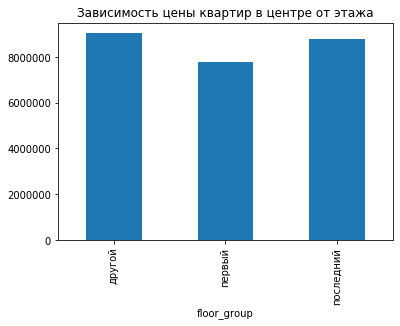

In [64]:

apartments_data_spb_in_center.groupby('floor_group').median()['last_price'].plot(x='floor_group', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от этажа')

Стоимость квартир на 1ом этаже значительно ниже, чем стоимость квартир на других этажах. Цена квартир на последнем этаже выше чем на первом, но немного ниже, чем на других

Далее определим есть ли зависимость цены от даты, когда было выставлено объявление:

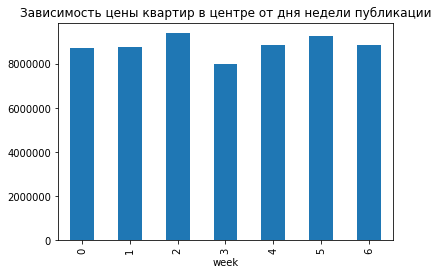

In [65]:

apartments_data_spb_in_center.groupby('week').median()['last_price'].plot(x='week', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от дня недели публикации')

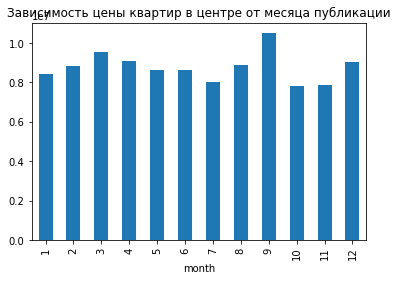

In [66]:

apartments_data_spb_in_center.groupby('month').median()['last_price'].plot(x='month', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от месяца публикации')

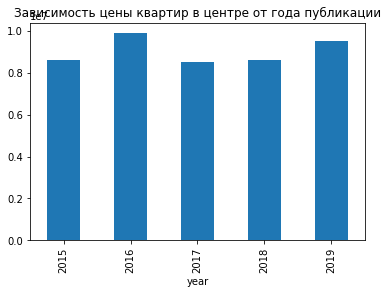

In [67]:

apartments_data_spb_in_center.groupby('year').median()['last_price'].plot(x='year', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от года публикации')

Явной зависимости между днями недели и ценой практически нет. Месяц сентябрь немного выделяется, цены в этом месяце чуть выше, чем в другие. По графику зависимости цены от года заметно что в 2016 цены были немного выше чем в остальных годах. Но в целом все характеристики находтяс примерно в равном диапазоне

Посмотрим на зависмость стоимости от количества комнат:

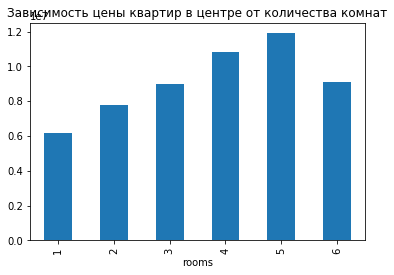

In [68]:

apartments_data_spb_in_center.groupby('rooms').median()['last_price'].plot(x='rooms', y="last_price",kind = 'bar',
                            title='Зависимость цены квартир в центре от количества комнат')

Видим, что зависимость цены от количества комнат в квартирах в центре очень схожа с зависимостью в других районах города и его области. Чем больше количество комнат, тем дороже стоимость жилья. Разве что квартиры с 6ю и 3мя комнатами находятся в примерно равном ценовом диапазоне.

Для квартир в центре Питера, квартир в остальных районах города и квартир в лен. области построим общий график зависимости цены от количесва дней публикации объявления

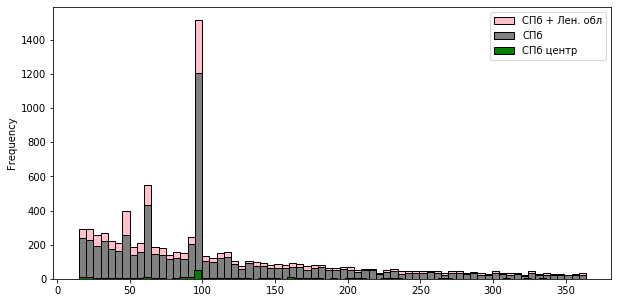

In [69]:
ax = plt.gca()

apartments_data_query['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='pink')
apartments_data_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='grey')
apartments_data_spb_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='green')
plt.legend(['СПб + Лен. обл', 'СПб', 'СПб центр'])

Немного "подрежем" границы для наглядонсти. Проверим зависмость параметров за полгода:

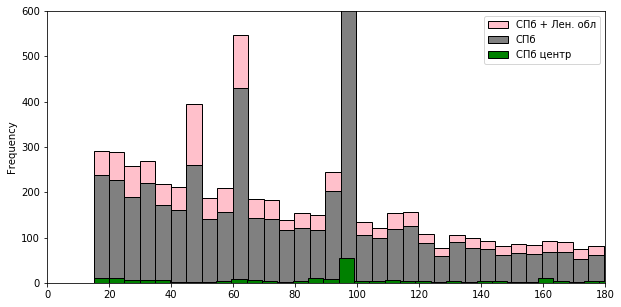

In [70]:
ax = plt.gca()

apartments_data_query['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='pink' ,ylim=(0,600), xlim=(0, 180))
apartments_data_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='gray',ylim=(0,600), xlim=(0, 180))
apartments_data_spb_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='green')
plt.legend(['СПб + Лен. обл', 'СПб', 'СПб центр'])

Сравним цены на квартиры СПб+Лен.обл, СПб и СПб+центр в зависимости от дня, месяца и года публикации:

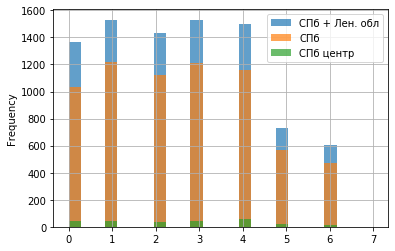

In [71]:
ax = apartments_data_query['week'].plot(y = 'last_price',kind='hist',range=(0, 7),bins=25,
                              linewidth=5,alpha=0.7)

apartments_data_spb['week'].plot(y = 'last_price',kind='hist',range=(0,7),bins=25,linewidth=5,alpha=0.7,
                       ax=ax, grid=True,legend=True)

apartments_data_spb_in_center['week'].plot(y = 'last_price',kind='hist',range=(0,7),bins=25,linewidth=5,alpha=0.7,
                    ax=ax, grid=True,legend=True)
plt.legend(['СПб + Лен. обл', 'СПб', 'СПб центр'])

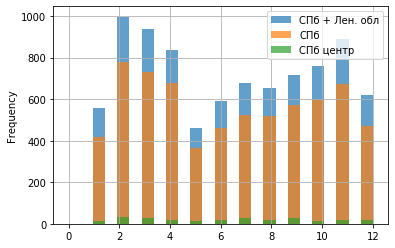

In [72]:
ax = apartments_data_query['month'].plot(y = 'last_price',kind='hist',range=(0, 12),bins=25,
                              linewidth=5,alpha=0.7)

apartments_data_spb['month'].plot(y = 'last_price',kind='hist',range=(0,12),bins=25,linewidth=5,alpha=0.7,
                       ax=ax, grid=True,legend=True)

apartments_data_spb_in_center['month'].plot(y = 'last_price',kind='hist',range=(0,12),bins=25,linewidth=5,alpha=0.7,
                    ax=ax, grid=True,legend=True)
plt.legend(['СПб + Лен. обл', 'СПб', 'СПб центр'])

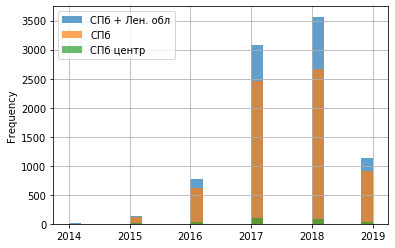

In [73]:
ax = apartments_data_query['year'].plot(y = 'last_price', kind='hist',range=(2014,2019),bins=25,
                              linewidth=5,alpha=0.7)

apartments_data_spb['year'].plot(y = 'last_price',kind='hist',range=(2014,2019),bins=25,linewidth=5,alpha=0.7,
                       ax=ax, grid=True,legend=True)

apartments_data_spb_in_center['year'].plot(y = 'last_price',kind='hist',range=(2014,2019),bins=25,linewidth=5,alpha=0.7,
                    ax=ax, grid=True,legend=True)
plt.legend(['СПб + Лен. обл', 'СПб', 'СПб центр'])

- По дням недели:
Квартиры в центре СПб, Спб и Лен.области, по которым объявления о продаже появились на рынке в будний день, продаются по незначительно более высокой цене.

- По месяцу:
Январь и май для города и области по стоимости чуть меньше, чем остальные месяцы. Квартиры, которые выставляют на продажу с февраля по апрель имеют более высокую цену. Так же, начиная с июня месяца можно увидеть общую тенденцию по возврастанию стоимости квартир, подходя к осени.  По квартирам в центре зависимости явной нет.

- По году:
По Питеру и его области стоимость квартир выше в 2018 году. Наименьшая стоимость квартир для всех областей наблюдалась в 2014-2016 годах.

Общие выводы по каждому из исследуемых параметров:

- Чем больше площадь квартиры, тем больше ее стоимость
- Аналогичная зависимость наблюдается для стоимости квадратного метра, жилой площади и площади кухни, количества комнат. Чем эти показатели выше, тем, как правило, выше и стоимость квартиры
- Квартиры на первом этаже - самый не дорогие, чуть дороже на последнем, на других этажах по квартирам уже будут выше
- Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных
- Среди городов с наибольшим числом объявлений, самые дорогие цены за квадратный метр квартиры в Санкт-Петербурге, Пушкине и Сестрорецке, а самые низкие цены в Колпино и Всеволжске
- Определили центральную область в Питере, где наблюдается резкий скачок цен за квартиры: прмерно до 7 км расстояния от центра определили большие скачки в стоимости квартир, далее наблюдали резкое снижение стоимости.
- Квартиры, которые выставляют на продажу с февраля по апрель имеют более высокую цену. Так же, начиная с июня месяца можно увидеть общую тенденцию по возврастанию стоимости квартир, подходя к осени. Январь и май для каждой из областей по стоимости чуть меньше, чем остальные месяцы. 
- Квартиры, размещенные к продаже в 201 году, дороже всех. В период 2014-2016 годов цены на квартиры были значительно ниже

Добавим к выводу медианы основных характеристик:

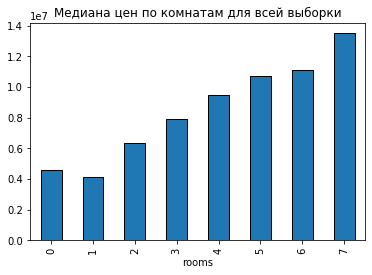

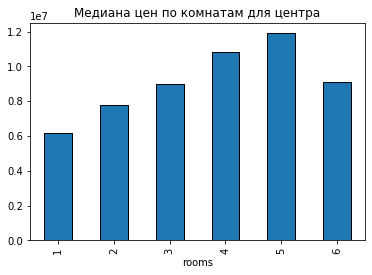

In [90]:
apartments_data_query.groupby('rooms').median()['last_price'].plot(x='rooms', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по комнатам для всей выборки')

plt.show()

apartments_data_spb_in_center.groupby('rooms').median()['last_price'].plot(x='rooms', y="last_price",kind = 'bar',ec='black',
                            title='Медиана цен по комнатам для центра')

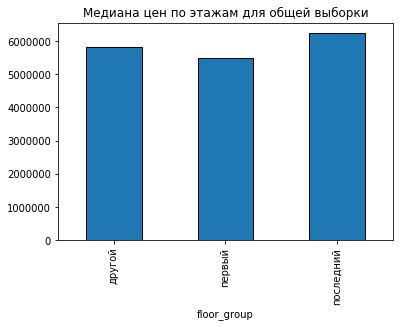

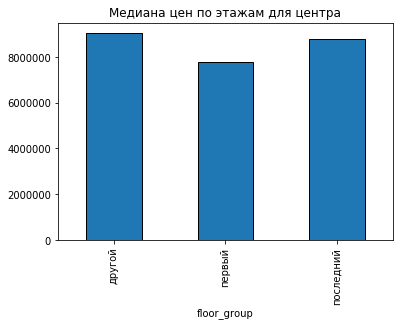

In [91]:
apartments_data_query.groupby('floor_group').median()['last_price'].plot(x='floor_group', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по этажам для общей выборки')
plt.show()

apartments_data_spb_in_center.groupby('floor_group').median()['last_price'].plot(x='floor_group', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по этажам для центра')

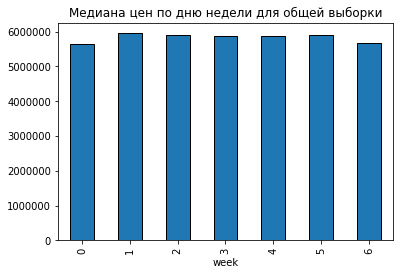

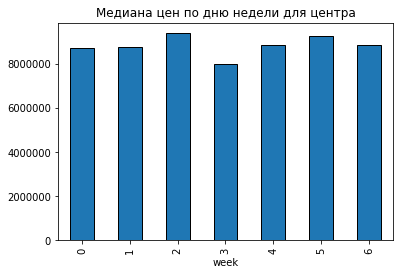

In [93]:
apartments_data_query.groupby('week').median()['last_price'].plot(x='week', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по дню недели для общей выборки')

plt.show()

apartments_data_spb_in_center.groupby('week').median()['last_price'].plot(x='week', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по дню недели для центра')

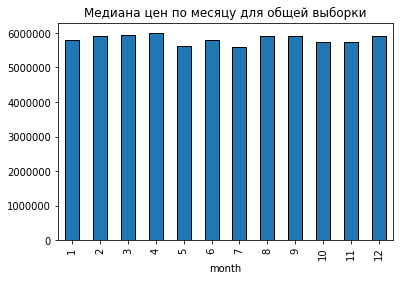

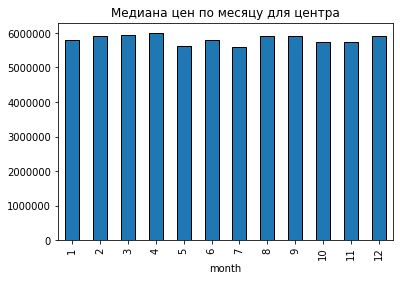

In [94]:
apartments_data_query.groupby('month').median()['last_price'].plot(x='month', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по месяцу для общей выборки')

plt.show()

apartments_data_query.groupby('month').median()['last_price'].plot(x='month', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по месяцу для центра')

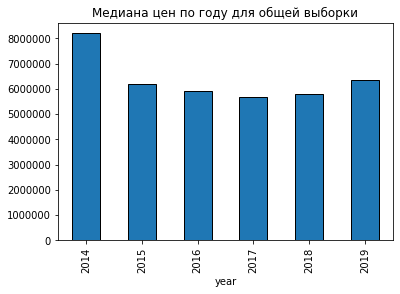

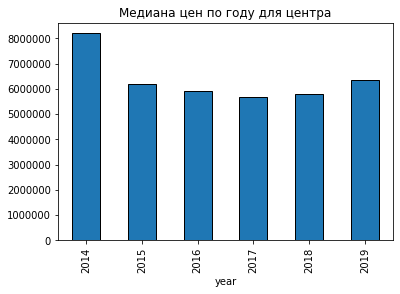

In [95]:
apartments_data_query.groupby('year').median()['last_price'].plot(x='month', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по году для общей выборки')

plt.show()

apartments_data_query.groupby('year').median()['last_price'].plot(x='month', y="last_price", kind='bar', ec='black', 
                            title='Медиана цен по году для центра')